# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [2]:
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 406kB/s]
100% 235k/235k [00:00<00:00, 405kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
 df = pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time']) #to convert time to date_time

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [6]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [8]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000,20000
mean,3278.186887,281.162680,0.048396,0.0,49.384600,2017-10-22 04:13:17.939999744
min,113.000000,243.390000,0.000000,0.0,0.000000,2016-11-18 15:00:00
25%,1228.750000,271.950000,0.000000,0.0,1.000000,2017-04-30 14:45:00
50%,3430.000000,281.825000,0.000000,0.0,75.000000,2017-10-21 07:30:00
75%,4928.000000,291.840000,0.000000,0.0,90.000000,2018-04-13 21:00:00
max,16781.000000,310.070000,10.600000,0.0,92.000000,2018-09-30 23:00:00
std,1977.171357,12.661288,0.398007,0.0,39.647341,NaN


In [9]:
df.sort_values(by='date_time',inplace=True)

In [11]:
df.duplicated()

,0
7745,False
4628,False
14496,False
8867,False
3867,False
...,...
6605,False
14241,False
9500,False
15201,False


In [12]:
df.duplicated().sum()

12

In [13]:
df.isnull()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
7745,False,False,False,False,False,False,False,False
4628,False,False,False,False,False,False,False,False
14496,False,False,False,False,False,False,False,False
8867,False,False,False,False,False,False,False,False
3867,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6605,False,False,False,False,False,False,False,False
14241,False,False,False,False,False,False,False,False
9500,False,False,False,False,False,False,False,False
15201,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [16]:
df.dropna(inplace=True)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.set_index('date_time',inplace=True)

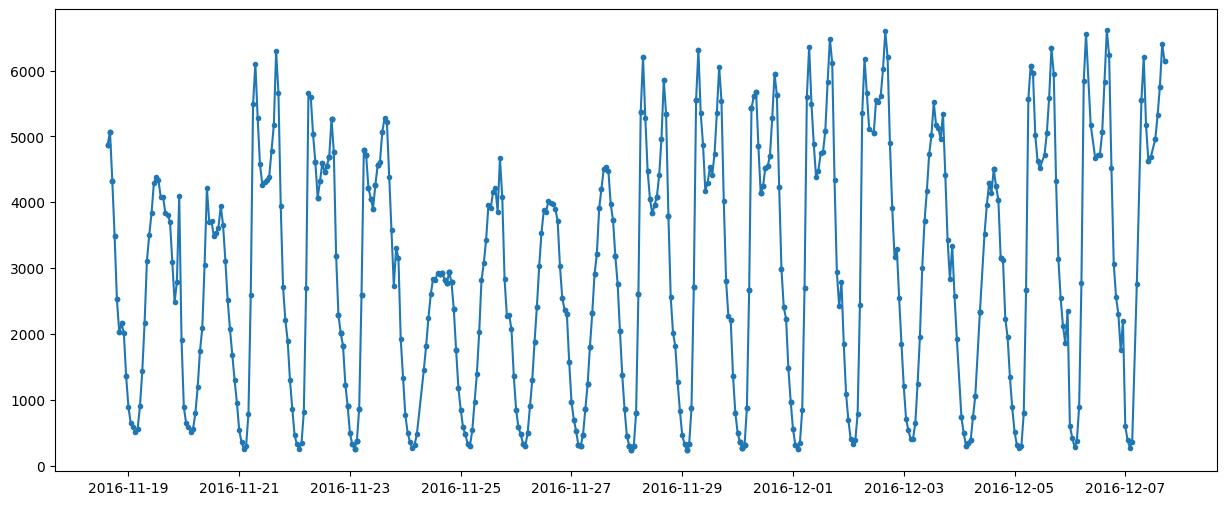

In [19]:
df_specific = df.iloc[:700]
plt.figure(figsize=(15, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  object 
 6   weather_description  19968 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [22]:
weekly_data = df.resample('W').agg({   #increasing the scale from hourly to weekly
  'traffic_volume': 'mean','temp': 'mean','rain_1h': 'mean','snow_1h': 'mean','clouds_all': 'mean','weather_main': lambda x: x.mode()[0],
  'weather_description': lambda x: x.mode()[0]
})
weekly_data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-20,2743.294118,271.270147,0.000000,0.0,56.823529,Clouds,sky is clear
2016-11-27,2545.708904,273.955205,0.000000,0.0,68.157534,Mist,mist
2016-12-04,3000.749064,275.831610,0.000000,0.0,87.348315,Rain,overcast clouds
2016-12-11,3181.322581,266.158479,0.000000,0.0,73.129032,Snow,light snow
2016-12-18,2950.348624,256.773743,0.000000,0.0,44.958716,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-09-02,3373.411765,293.413710,0.726742,0.0,53.162896,Rain,light rain
2018-09-09,3073.719665,291.749833,0.665858,0.0,46.175732,Rain,sky is clear
2018-09-16,3417.029240,296.505556,0.094912,0.0,22.883041,Clear,sky is clear


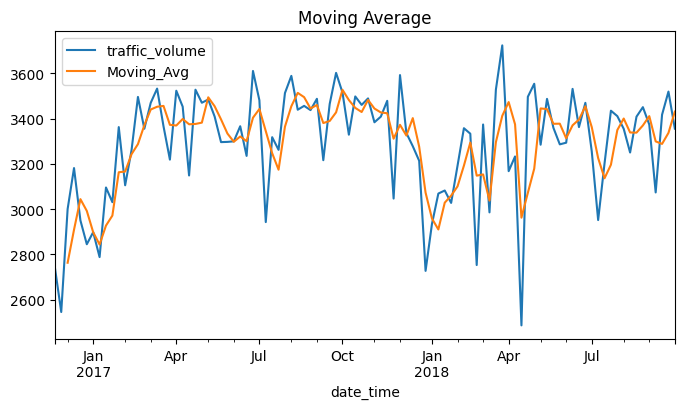

In [24]:
weekly_data['Moving_Avg'] = weekly_data['traffic_volume'].rolling(window=3).mean()
weekly_data[['traffic_volume', 'Moving_Avg']].plot(figsize=(8, 4))
plt.title('Moving Average')
plt.show()

<Figure size 2500x1500 with 0 Axes>

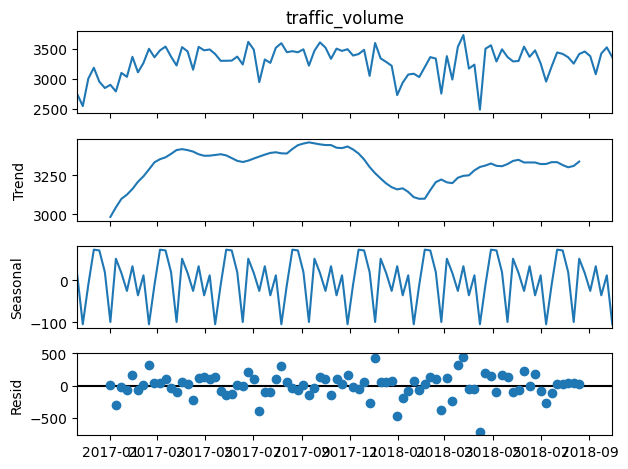

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(25, 15))
decomposition = seasonal_decompose(weekly_data['traffic_volume'], model='additive', period=12)
decomposition.plot()

plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
#I did everything mentioned above ^^^^

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [27]:
for i in range(1,6):
  df[f'lag_{i}'] = df['traffic_volume'].shift(i)

df['Moving_Avg'] = df['traffic_volume'].rolling(window=3).mean()

df['traffic_volume_diff'] = df['traffic_volume'].diff()
df.dropna(inplace=True)

df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

In [28]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3,lag_4,lag_5,Moving_Avg,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,,,,,
2016-11-18 18:00:00,3486.0,273.59,0.0,0.0,90,Mist,mist,3486.0,4328.0,4328.0,4328.0,5074.0,3766.666667,0.0,4,11,323
2016-11-18 19:00:00,2524.0,273.58,0.0,0.0,90,Snow,light snow,3486.0,3486.0,4328.0,4328.0,4328.0,3165.333333,-962.0,4,11,323
2016-11-18 19:00:00,2524.0,273.58,0.0,0.0,90,Mist,mist,2524.0,3486.0,3486.0,4328.0,4328.0,2844.666667,0.0,4,11,323
2016-11-18 20:00:00,2027.0,273.28,0.0,0.0,90,Snow,light snow,2524.0,2524.0,3486.0,3486.0,4328.0,2358.333333,-497.0,4,11,323
2016-11-18 20:00:00,2027.0,273.28,0.0,0.0,90,Mist,mist,2027.0,2524.0,2524.0,3486.0,3486.0,2192.666667,0.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,3947.0,4132.0,4283.0,4302.0,4302.0,3874.000000,-404.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3543.0,3947.0,4132.0,4283.0,4302.0,3423.666667,-762.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2781.0,3543.0,3947.0,4132.0,4283.0,2827.666667,-622.0,6,9,273


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [30]:
import tensorflow as tf
from tensorflow import keras

keras.utils.set_random_seed(42)

In [32]:
from sklearn.model_selection import train_test_split

X=df.drop('traffic_volume',axis=1)
y=df['traffic_volume']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=False, random_state=42)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [33]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [34]:
num_col = X_train.select_dtypes(include='number').columns
cat_col = X_train.select_dtypes(include='object').columns

In [36]:
onehot = OneHotEncoder(drop='first')
scaler =  MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),
        ('cat', onehot, cat_col)
    ])



In [37]:
cat_col

Index(['weather_main', 'weather_description'], dtype='object')

In [38]:
X_train.shape, X_val.shape, X_test.shape

((12772, 16), (3194, 16), (3992, 16))

In [39]:
y_train.shape, y_val.shape, y_test.shape

((12772,), (3194,), (3992,))

In [41]:
train_time = X_train.index
val_time = X_val.index
test_time = X_test.index


In [42]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()
X_test = preprocessor.transform(X_test).toarray()

In [43]:
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_val = scaler.transform(y_val.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))
y_train = pd.DataFrame(y_train, columns=['traffic_volume'])
y_val = pd.DataFrame(y_val, columns=['traffic_volume'])
y_test = pd.DataFrame(y_test, columns=['traffic_volume'])


In [44]:
X_train.index = train_time
X_val.index = val_time
X_test.index = test_time

y_train.index = train_time
y_val.index = val_time
y_test.index = test_time

In [45]:
X_train

,num__temp,num__rain_1h,num__snow_1h,num__clouds_all,num__lag_1,num__lag_2,num__lag_3,num__lag_4,num__lag_5,num__Moving_Avg,...,cat__weather_description_shower drizzle,cat__weather_description_sky is clear,cat__weather_description_sleet,cat__weather_description_smoke,cat__weather_description_snow,cat__weather_description_thunderstorm,cat__weather_description_thunderstorm with heavy rain,cat__weather_description_thunderstorm with light drizzle,cat__weather_description_thunderstorm with light rain,cat__weather_description_thunderstorm with rain
date_time,,,,,,,,,,,,,,,,,,,,,
2016-11-18 18:00:00,0.474619,0.0,0.0,0.978261,0.202364,0.252880,0.252880,0.252880,0.297636,0.371044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 19:00:00,0.474462,0.0,0.0,0.978261,0.202364,0.202364,0.252880,0.252880,0.252880,0.309976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 19:00:00,0.474462,0.0,0.0,0.978261,0.144648,0.202364,0.202364,0.252880,0.252880,0.277411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 20:00:00,0.469747,0.0,0.0,0.978261,0.144648,0.144648,0.202364,0.202364,0.252880,0.228022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 20:00:00,0.469747,0.0,0.0,0.978261,0.114831,0.144648,0.144648,0.202364,0.202364,0.211198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-26 15:00:00,0.575672,0.0,0.0,0.815217,0.321034,0.315995,0.317255,0.294936,0.274778,0.552283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-26 16:00:00,0.571429,0.0,0.0,0.010870,0.341793,0.321034,0.315995,0.317255,0.294936,0.592262,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-26 17:00:00,0.561999,0.0,0.0,0.815217,0.386849,0.341793,0.321034,0.315995,0.317255,0.604617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12772 entries, 2016-11-18 18:00:00 to 2018-01-26 19:00:00
Data columns (total 56 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   num__temp                                                     12772 non-null  float64
 1   num__rain_1h                                                  12772 non-null  float64
 2   num__snow_1h                                                  12772 non-null  float64
 3   num__clouds_all                                               12772 non-null  float64
 4   num__lag_1                                                    12772 non-null  float64
 5   num__lag_2                                                    12772 non-null  float64
 6   num__lag_3                                                    12772 non-null  float64
 7   num__lag_4                      

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [48]:
from keras import layers
from keras.models import Sequential

In [49]:

model_RNN = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(32, return_sequences=True, recurrent_dropout=0.15),
    layers.SimpleRNN(64),
    layers.Dropout(0.15),
    layers.Dense(1),
])

model_RNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 56, 32)              │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:

model_lstm = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.LSTM(32, return_sequences=True, recurrent_dropout=0.15),
    layers.LSTM(64),
    layers.Dropout(0.15),
    layers.Dense(1),
])

model_lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 56, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_RNN.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

model_lstm.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)



In [52]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=30,
    restore_best_weights=True,
)


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [53]:
RNN_history = model_RNN.fit(
    X_train, y_train,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.2533 - mean_squared_error: 0.1058 - val_loss: 0.1096 - val_mean_squared_error: 0.0166
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1407 - mean_squared_error: 0.0306 - val_loss: 0.1099 - val_mean_squared_error: 0.0163
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1171 - mean_squared_error: 0.0203 - val_loss: 0.1066 - val_mean_squared_error: 0.0153
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1095 - mean_squared_error: 0.0173 - val_loss: 0.0895 - val_mean_squared_error: 0.0111
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0966 - mean_squared_error: 0.0140 - val_loss: 0.0818 - val_mean_squared_error: 0.0107
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0852 - mean_squared_error: 0.0114 - val_loss: 0.0728 - val_mean_squared_error: 0.0074
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0778 - mean_squared_error: 0.0098 - val_lo

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [54]:
RNN_pred = model_RNN.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [55]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 95.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [59]:
MAE = mean_absolute_error(y_test, RNN_pred)
MSE = mean_squared_error(y_test, RNN_pred)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, RNN_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MAPE: {MAPE}')

MAE: 0.036148902588342906
MSE: 0.0026116675026786186
RMSE: 0.05110447634678022
MAPE: 0.6150347957022276


<Axes: xlabel='date_time'>

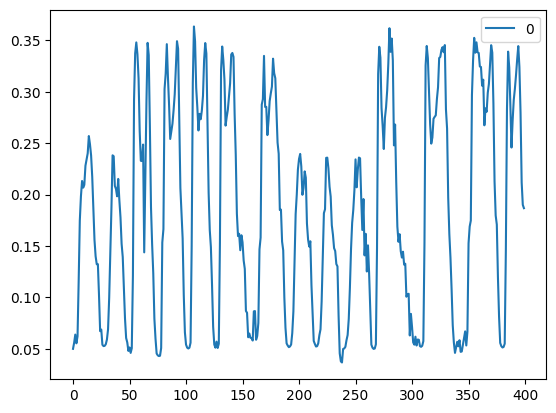

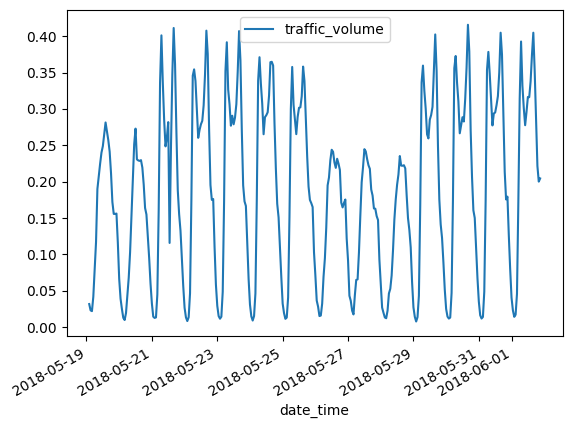

In [61]:
pd.DataFrame(RNN_pred)[:400].plot()
pd.DataFrame(y_test)[:400].plot()

<Axes: >

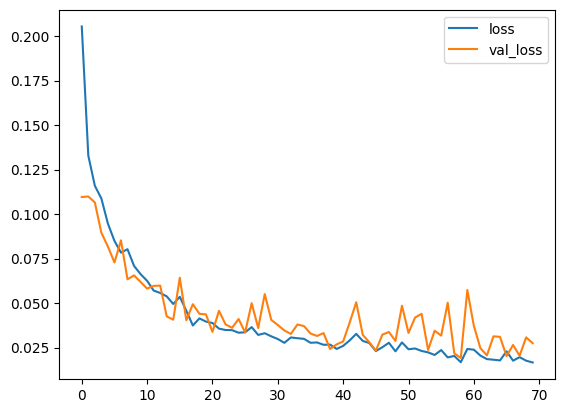

In [62]:
pd.DataFrame(RNN_history.history)[['loss','val_loss']].plot()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [63]:
LSTM_history = model_lstm.fit(
     X_train, y_train,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - loss: 0.1131 - mean_squared_error: 0.0181 - val_loss: 0.1104 - val_mean_squared_error: 0.0159
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 0.1019 - mean_squared_error: 0.0139 - val_loss: 0.1069 - val_mean_squared_error: 0.0149
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 0.1005 - mean_squared_error: 0.0138 - val_loss: 0.1062 - val_mean_squared_error: 0.0149
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0972 - mean_squared_error: 0.0132 - val_loss: 0.1050 - val_mean_squared_error: 0.0154
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.1004 - mean_squared_error: 0.0141 - val_loss: 0.1014 - val_mean_squared_error: 0.0134
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.0961 - mean_squared_error: 0.0126 - val_loss: 0.0883 - val_mean_squared_error: 0.0113
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.1075 - mean_squared_error: 0.0174 - va

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [64]:
LSTM_pred = model_lstm.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [67]:
MAE = mean_absolute_error(y_test, LSTM_pred)
MSE = mean_squared_error(y_test, LSTM_pred)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, LSTM_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MAPE: {MAPE}')

MAE: 0.10486396924955611
MSE: 0.014275903830163368
RMSE: 0.11948181380512839
MAPE: 1.849248303064304


<Axes: xlabel='date_time'>

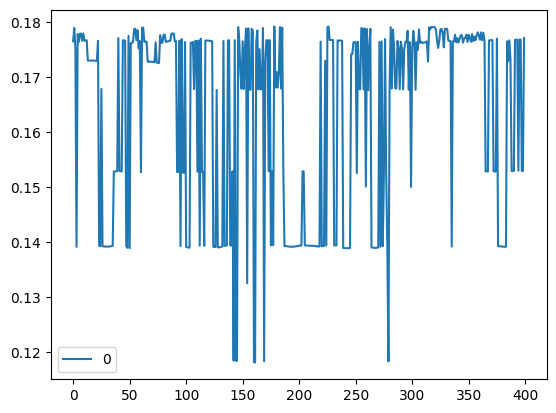

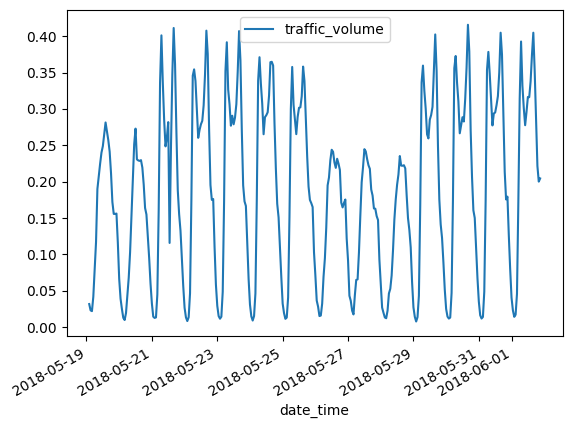

In [69]:
pd.DataFrame(LSTM_pred)[:400].plot()
pd.DataFrame(y_test)[:400].plot()

<Axes: >

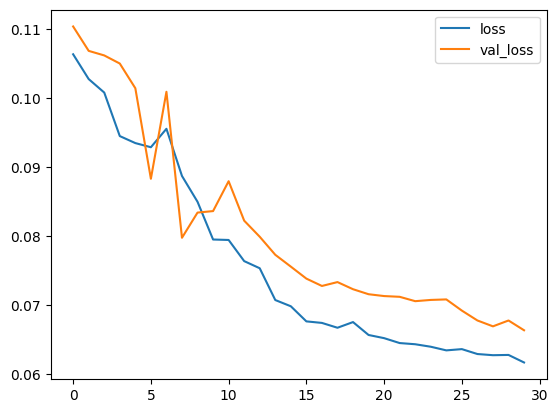

In [70]:
pd.DataFrame(LSTM_history.history)[['loss','val_loss']].plot()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
1-Dropping null values ensures that the data used for training is complete and consistent. Missing values can introduce bias or errors into the model's predictions.
2-Yes, I did perform feature engineering to enhance the forecasting model.
3-Model Types: Long Short-Term Memory (LSTM) and RNN.
4- I experimented with different batch sizes ( 32, 64) and 70 epochs.
5-Loss Function: Mean Squared Error (MSE).
6-Learning Rate: The learning rate controls how quickly the model adjusts its weights during training. A smaller learning rate can lead to slower convergence but may help avoid overfitting.
Dropout Rate: Dropout is a regularization technique that randomly drops units during training to prevent overfitting.
Number of Neurons: The number of neurons in each layer of the LSTM network can affect the model's capacity and generalization ability.
Batch Size: As discussed earlier, the batch size can influence training speed and convergence.
7-I did not encounter any of it.
8-Ensemble Methods
-Neural Network Architectures
-Hybrid Models.






